# Machine Learning - Supervised learning - Classification

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploring-the-data" data-toc-modified-id="Exploring-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploring the data</a></span></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Logistic regression</a></span></li><li><span><a href="#Let's-do-it" data-toc-modified-id="Let's-do-it-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Let's do it</a></span><ul class="toc-item"><li><span><a href="#Let's-train-a-model:-without-splitting-just-yet" data-toc-modified-id="Let's-train-a-model:-without-splitting-just-yet-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Let's train a model: without splitting just yet</a></span></li><li><span><a href="#Let's-create-a-prediction-column-for-the-entire-dataframe:-skipping-metrics-for-now" data-toc-modified-id="Let's-create-a-prediction-column-for-the-entire-dataframe:-skipping-metrics-for-now-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Let's create a prediction column for the entire dataframe: skipping metrics for now</a></span></li><li><span><a href="#Confusion-matrix-with-our-data" data-toc-modified-id="Confusion-matrix-with-our-data-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Confusion matrix with our data</a></span></li></ul></li><li><span><a href="#We-do-the-same-with-many-predictors" data-toc-modified-id="We-do-the-same-with-many-predictors-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>We do the same with many predictors</a></span><ul class="toc-item"><li><span><a href="#Review-of-Train-Test-Split-/-DIVISION-IN-TRAIN-TEST" data-toc-modified-id="Review-of-Train-Test-Split-/-DIVISION-IN-TRAIN-TEST-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Review of Train Test Split / DIVISION IN TRAIN TEST</a></span></li><li><span><a href="#Let's-see-what-we-got" data-toc-modified-id="Let's-see-what-we-got-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Let's see what we got</a></span><ul class="toc-item"><li><span><a href="#part-of-train" data-toc-modified-id="part-of-train-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>part of train</a></span></li><li><span><a href="#test-part" data-toc-modified-id="test-part-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>test part</a></span></li></ul></li></ul></li><li><span><a href="#Predict-Proba" data-toc-modified-id="Predict-Proba-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Predict Proba</a></span></li><li><span><a href="#Metrics!" data-toc-modified-id="Metrics!-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Metrics!</a></span><ul class="toc-item"><li><span><a href="#Confusion-matrix" data-toc-modified-id="Confusion-matrix-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Confusion matrix</a></span></li><li><span><a href="#Accuracy" data-toc-modified-id="Accuracy-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Accuracy</a></span></li><li><span><a href="#Precision" data-toc-modified-id="Precision-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Precision</a></span></li><li><span><a href="#Recall" data-toc-modified-id="Recall-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Recall</a></span></li><li><span><a href="#Differentiating-precision-and-recall" data-toc-modified-id="Differentiating-precision-and-recall-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Differentiating precision and recall</a></span></li><li><span><a href="#F1-Score" data-toc-modified-id="F1-Score-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>F1 Score</a></span></li></ul></li><li><span><a href="#Other-classification-models" data-toc-modified-id="Other-classification-models-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Other classification models</a></span></li><li><span><a href="#We-make-predictions-and-measure" data-toc-modified-id="We-make-predictions-and-measure-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>We make predictions and measure</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns


# Viz mantra

from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

In [4]:
# Model & split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

* **regression** models are used when the target variable is **quantitative**:
  - wages
  - gas emission
  - age of the person in a photo
  
* **classification**: models are used when the target variable is **qualitative**:
  - survive (or not) the Titanic
  - repay (or not) a loan
  - identify a dog (or not) in a photo
  - decide which of 3 plant species this is
  - ...

## Exploring the data

In [7]:
df = pd.read_csv("breast_cancer.csv")

In [8]:
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,is_cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


Documentation:  
a) radius (mean of distances from center to points on the perimeter)  
b) texture (standard deviation of gray-scale values)  
c) perimeter  
d) area  
e) smoothness (local variation in radius lengths)  
f) compactness (perimeter^2 / area - 1.0)  
g) concavity (severity of concave portions of the contour)  
h) concave points (number of concave portions of the contour)  
i) symmetry  
j) fractal dimension ("coastline approximation" - 1)  

The target variable is `is_cancer`.

It is a categorical variable, which takes the possible values ​​$0$ and $1$

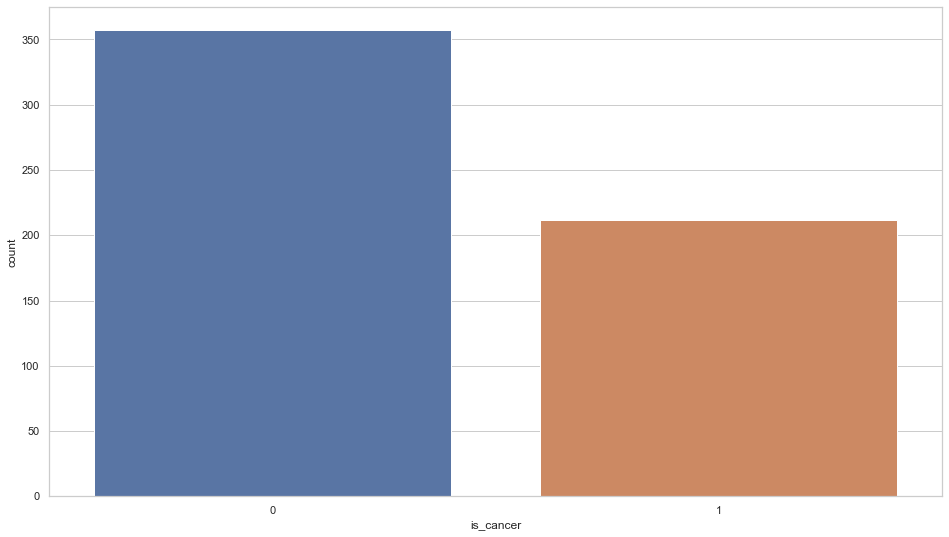

In [9]:
sns.countplot(x=df.is_cancer);

## Logistic regression
Logistic regression is one of the most popular and used algorithms for classification problems. Since it is also relatively uncomplicated and easy to implement, it is often used as a starting model, although it can also produce very high-performance results used in production. Here we are going to talk about Binomial Logistic Regression, which is used for binary results. Multinomial Logistic Regression exists and can be used for multiclass classification problems, but it is used less frequently. We will not cover it in this lesson.

Logistic regression is actually a transformed linear regression function. We can see in the image below that if we tried to fit a linear regression to some data with a binary result, we would fit a line that does not predict very well for any value that is not in the extreme values: in the middle there is a lot of area where the line is very far from the points. To make our function closer to the data, we have to transform the function we are using. In this case, it is useful to use a sigmoid function, which estimates an "S" shape. Now we can see that our line fits the data much better.

![regresiónlogística](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281070/linear_vs_logistic_regression_edxw03.png)

Refs:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html     
https://techdifferences.com/difference-between-linear-and-logistic-regression.html    
https://stackoverflow.com/questions/12146914/what-is-the-difference-between-linear-regression-and-logistic-regression

## Let's do it

Let's try to predict `is_cancer` using only `mean_radius` as a predictor.

In [10]:
df.sample()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,is_cancer
74,12.31,16.52,79.19,470.9,0.09172,0.06829,0.03372,0.02272,0.172,0.05914,...,23.21,89.71,611.1,0.1176,0.1843,0.1703,0.0866,0.2618,0.07609,0


### Let's train a model: without splitting just yet

In [11]:
from sklearn.linear_model import LogisticRegression #instead of LinearRegression()

In [ ]:
# 1. only using one feature
# 2. train/test split

In [12]:
lr  = LogisticRegression()

In [13]:
df.sample() # mean radius & is_cancer

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,is_cancer
85,18.46,18.52,121.1,1075.0,0.09874,0.1053,0.1335,0.08795,0.2132,0.06022,...,27.68,152.2,1603.0,0.1398,0.2089,0.3157,0.1642,0.3695,0.08579,1


In [14]:
X = df[["mean_radius"]] # df
y = df.is_cancer # series

In [17]:
X.shape

(569, 1)

In [18]:
y.shape

(569,)

In [19]:
lr.fit(X, y)

LogisticRegression()

In [20]:
y_pred = lr.predict(X)

In [21]:
y_pred # [0, 1, 1]

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [ ]:
# 333 -> common 0 -> 
    # we're right 333 times when it is not
    
# 167 ->   we're right when it is cancer 167

In [29]:
pd.crosstab(y,
           y_pred,
           rownames=["y_pred: 🔮"],
           colnames=["y: truth"])

y: truth,0,1
y_pred: 🔮,,
0,333,24
1,45,167


In [ ]:
"""
Good
333: True Negative: TN
167: True Positive: TP

Bad
24: I have covid, but test says I don't: FN
45: 45 will be positive, and they were not. Failed / False  positive: FP

"""

### Let's create a prediction column for the entire dataframe: skipping metrics for now

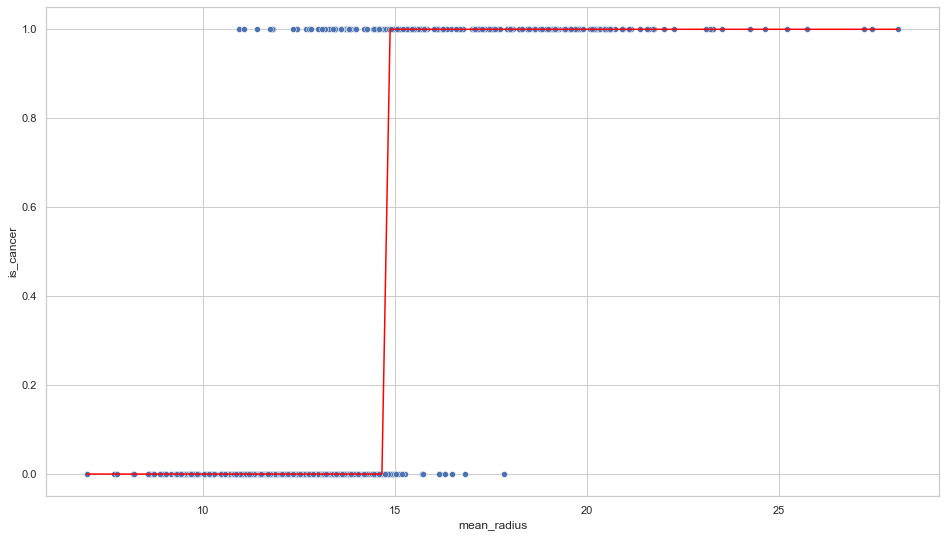

In [33]:
x = np.linspace(df.mean_radius.min(), df.mean_radius.max(), 100)
y = lr.predict(x.reshape(-1 ,1))

sns.scatterplot(x = df.mean_radius, y = df.is_cancer)
plt.plot(x, y, c="red");

### Confusion matrix with our data

* 333 times - **We have predicted NO and it is NO** -> True
* 24 times - We have predicted YES and it is NO -> False
* 45 times - We have preached NO and it is YES -> False
* 167 times - **We have predicted YES and it is YES** -> True

## We do the same with many predictors

### Review of Train Test Split / DIVISION IN TRAIN TEST

![divisióntraintest](../images/traintest.png)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
df = pd.read_csv("breast_cancer.csv")

In [36]:
X = df.drop("is_cancer", axis=1) # df
y = df.is_cancer # series

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Kit-kat (max iter)
I get this warning... we'll see hyperparameter tuning, but basically I have to scale my data or make the model more complex with more iterations.
```
/usr/local/Caskroom/miniconda/base/envs/ironhack/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status =1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
```

### Let's see what we got
#### part of train

In [40]:
X_train.shape

(426, 30)

In [44]:
y_train.shape

(426,)

#### test part

In [42]:
X_test.shape

(143, 30)

In [46]:
y_test.shape

(143,)

In [47]:
lr = LogisticRegression()

In [48]:
lr.fit(X_train, y_train)

LogisticRegression()

In [50]:
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [52]:
pd.crosstab(
    y_test,
    y_pred,
    rownames=["THE TRUTH"],
    colnames=["TEST"]
)

# 90: TN
# 40: TP

# 9: FN -> It's positive, test says im not. False Negative
# 4: FP -> Im actually negative, test says positive. False Positive

TEST,0,1
THE TRUTH,,
0,90,4
1,9,40


## Predict Proba

In [64]:
first_row = [df.iloc[0][:-1]]
first_row

[mean_radius                  17.990000
 mean_texture                 10.380000
 mean_perimeter              122.800000
 mean_area                  1001.000000
 mean_smoothness               0.118400
 mean_compactness              0.277600
 mean_concavity                0.300100
 mean_concave_points           0.147100
 mean_symmetry                 0.241900
 mean_fractal_dimension        0.078710
 radius_error                  1.095000
 texture_error                 0.905300
 perimeter_error               8.589000
 area_error                  153.400000
 smoothness_error              0.006399
 compactness_error             0.049040
 concavity_error               0.053730
 concave_points_error          0.015870
 symmetry_error                0.030030
 fractal_dimension_error       0.006193
 worst_radius                 25.380000
 worst_texture                17.330000
 worst_perimeter             184.600000
 worst_area                 2019.000000
 worst_smoothness              0.162200


In [66]:
predicted_prob = lr.predict_proba(first_row)
predicted_prob

array([[3.10862447e-15, 1.00000000e+00]])

In [68]:
if predicted_prob[0][0] > predicted_prob[0][1]:
    print("NOT cancer")
else:
    print("cancer")

cancer


In [70]:
predicted_prob[0][0] + predicted_prob[0][1]

1.0

## Metrics!

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix

### Confusion matrix

`metrics`: binary and multi-lable classification [towardsdatasciece](https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f)

Confusion Matrix
We are going to explain how the confusion matrix works with a hypothetical marketing example. In this example, we contact 100 customers and 80 of them tell us that they are not interested and 20 of them that they are.

Our model (in the example) is not very good, although depending on what metric we use it might appear to be better than it is.

We have used as values ​​of the binary classification:

- 0: not interested
- 1: yes you are interested

![matrizdeconfusión](https://www.iartificial.net/wp-content/uploads/2019/11/Matriz-Confusion-Ejemplo.webp)

In the confusion matrix on the left you can see the values ​​for this example. In the confusion matrix on the right, the generic names when we use the English nomenclature: True Negative [TN], True Positive [TP], False Positive [FP], False Negative [FN].

Tip: to easily remember the confusion matrix:

Positive (Positive) or Negative (Negative): refers to the prediction. If the model predicts 1 then it will be positive, and if it predicts 0 it will be negative.
True (True) or False (False): refers to whether the prediction is correct or not.

<img src="https://github.com/andrewwlong/classification_metrics_sklearn/raw/541a0d065ffb8b3ff705161f6d16088d434b2ea7/img/conf_matrix.png">

Equivalent with sklearn

In [72]:
from sklearn.metrics import confusion_matrix

In [73]:
confusion_matrix(y_pred, y_test)

array([[90,  9],
       [ 4, 40]])

In [ ]:
# MAE
# MSE
# RMSE

# R2: TSS/RSS 

In [ ]:
# Accuracy: how many I got right out of everything
# Precision
# Recall 

# F1: precision & recall

### Accuracy

Accuracy measures the percentage of cases that the model has got right. This is one of the most used and favorite metrics… that I recommend you avoid! The problem with accuracy is that it can lead to deception, that is, it can make a bad model appear to be much better than it is.
The problem of using accuracy on unbalanced data.....

• Example: In a data set with 990 positives and 10
negatives, a classifier that always predicts “positive”,
would have a 0.99 hit rate And yet it's bad!

Represents the proportion of samples correctly predicted
 * The most common metric for ranking 🤔👀
 * It is useful when
  - the data set has balanced classes (similar proportion of True and False)
  - there is symmetry between True and False (for example, prediction of "male" or "female")
 * **Often misused!** since:
  - many problems are not symmetrical (for example, cancer vs. non-cancer)

The accuracy is calculated with the following formula:

$$accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

In [ ]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy_score(y_test, y_pred)

0.9090909090909091

Interpreting this metric, we see that the model has been correct 96% of the diagnoses, that is, it will be wrong 4% of the times it predicts.

### Precision

With the precision metric we can measure the quality of the machine learning model in classification tasks. In the example, it means that accuracy is the answer to the question: what percentage of the customers we contact will be interested?

To calculate the precision we will use the following formula:

$$precision = \frac{TP}{TP + FP}$$

It is the fraction of predicted positive events that are actually positive as shown below

This metric is defined as the number of true positive cases over the total number of everything you said was positive. In other words, of everything that the algorithm predicted as positive, it evaluates how much of it was true. One of the examples proposed [here](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9) is to mark an email as spam, when it really was not. Imagine that an anti-spam system has a low precision and marks an email as spam even though it is not, and you end up not reading your sister's wedding invitation.
One of the cases where this metric can be used, as the post says, is when the number of false positives has a very important impact. Imagine a classifier that mistakes a diagnosis and you end up amputating a patient's healthy leg.

This image marks the data sets selected when calculating precision.

<img src="https://www.iartificial.net/wp-content/uploads/2019/11/precision.webp">

Precision = Percentage of POSITIVE predictions that were correct.
What proportion of the predicted Positives is actually Positive?
We have to look at the total number of predicted Positives (True Positives plus False Positives, TP+FP), and see how many of them are True Positives (TP).

In [ ]:
from sklearn.metrics import precision_score

In [77]:
precision_score(y_test, y_pred)

0.9090909090909091

### Recall

The recall metric will inform us about the amount that the machine learning model is capable of identifying. In the example, it refers to the fact that recall is the answer to the question: what percentage of customers are interested are we able to identify?

To calculate recall we will use the following formula:

$$recall = \frac{TP}{TP + FN}$$

<img src="https://www.iartificial.net/wp-content/uploads/2019/11/recall-exhaustividad.webp">

It answers a different question: what proportion of real positives is correctly classified?
Percentage of positive cases that I have captured.

In [ ]:
from sklearn.metrics import recall_score

In [76]:
recall_score(y_test, y_pred)

0.8163265306122449

### Differentiating precision and recall
Despite being similar, they have subtle distinctions.

- Precision: How many times is what my model says really true?
- Recall: How many times is my model able to identify the truth?

Precision focuses on what the model says and then compares it to reality. On the other hand, recall starts from reality, and then evaluates how good the model is at recognizing it.

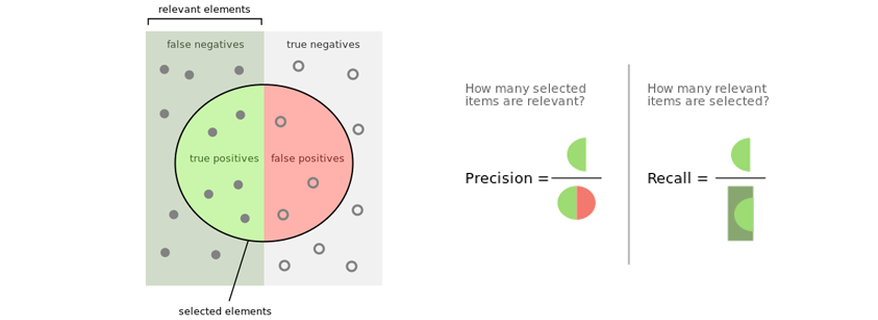

### F1 Score

The F1 value is used to combine the precision and recall measurements into a single value. This is handy because it makes it easier to compare the combined accuracy and recall performance between various solutions.

F1 is calculated by taking the harmonic mean between precision and recall:

$$F1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$$

In [ ]:
from sklearn.metrics import f1_score

In [75]:
f1_score(y_test, y_pred)

0.8602150537634408

In [83]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print("-------------")
print(f"F1 score: {f1_score(y_test, y_pred)}")

Accuracy: 0.9090909090909091
Precision: 0.9090909090909091
Recall: 0.8163265306122449
-------------
F1 score: 0.8602150537634408


I have extracted documentation of the metrics from [this](https://www.iartificial.net/precision-recall-f1-accuracy-in-classification/) exceptionally explained article.
But here I leave you more:
- https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9
- https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/
- https://wiki.pathmind.com/accuracy-precision-recall-f1

## Other classification models

In [85]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [86]:
models = {
    "disc_analysis": LinearDiscriminantAnalysis(),
    "knc": KNeighborsClassifier(),
    "GaussianNB": GaussianNB(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "svc": SVC()
}

In [ ]:
# train, test, split

In [87]:
for name, model in models.items():
    print(f"Training: {name}")
    model.fit(X_train, y_train)

Training: disc_analysis
Training: knc
Training: GaussianNB
Training: DecisionTreeClassifier
Training: svc


## We make predictions and measure

In [88]:
for name, model in models.items():
    print(f"------------------")
    print(model)
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 score: {f1_score(y_test, y_pred)}")

------------------
LinearDiscriminantAnalysis()
Accuracy: 0.9440559440559441
Precision: 1.0
Recall: 0.8367346938775511
F1 score: 0.9111111111111111
------------------
KNeighborsClassifier()
Accuracy: 0.9020979020979021
Precision: 0.8888888888888888
Recall: 0.8163265306122449
F1 score: 0.851063829787234
------------------
GaussianNB()
Accuracy: 0.9440559440559441
Precision: 0.9555555555555556
Recall: 0.8775510204081632
F1 score: 0.9148936170212767
------------------
DecisionTreeClassifier()
Accuracy: 0.916083916083916
Precision: 0.8627450980392157
Recall: 0.8979591836734694
F1 score: 0.8799999999999999
------------------
SVC()
Accuracy: 0.8951048951048951
Precision: 1.0
Recall: 0.6938775510204082
F1 score: 0.819277108433735


In [89]:
gnb = GaussianNB()

In [97]:
gnb.fit(X_train, y_train)

GaussianNB()

In [104]:
example = [df.iloc[1][:-1]]
example

[mean_radius                  20.570000
 mean_texture                 17.770000
 mean_perimeter              132.900000
 mean_area                  1326.000000
 mean_smoothness               0.084740
 mean_compactness              0.078640
 mean_concavity                0.086900
 mean_concave_points           0.070170
 mean_symmetry                 0.181200
 mean_fractal_dimension        0.056670
 radius_error                  0.543500
 texture_error                 0.733900
 perimeter_error               3.398000
 area_error                   74.080000
 smoothness_error              0.005225
 compactness_error             0.013080
 concavity_error               0.018600
 concave_points_error          0.013400
 symmetry_error                0.013890
 fractal_dimension_error       0.003532
 worst_radius                 24.990000
 worst_texture                23.410000
 worst_perimeter             158.800000
 worst_area                 1956.000000
 worst_smoothness              0.123800


In [110]:
df.iloc[1][-1]

1.0

In [111]:
gnb.predict(example) #F1: 0.91

array([1])

# Logistic regression: visual example (only three features)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio

# Load your dataset
data = pd.read_csv('../datasets/breast_cancer.csv')  # Replace 'your_dataset.csv' with your actual dataset file path

# Split the data into features and target
X = data[["mean_radius", "mean_area", "mean_symmetry"]]
y = data['is_cancer']

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Generate predictions
y_pred = model.predict(X)

# Create a 3D interactive plot with decision boundary
fig = go.Figure(data=[
    go.Scatter3d(
        x=X['mean_radius'],
        y=X['mean_area'],
        z=X['mean_symmetry'],
        mode='markers',
        marker=dict(
            size=4,
            color=y,
            colorscale='Viridis',
            opacity=0.8
        )
    )
])

# Generate a meshgrid of points to create decision boundary
x_min, x_max = X['mean_radius'].min() - 1, X['mean_radius'].max() + 1
y_min, y_max = X['mean_area'].min() - 1, X['mean_area'].max() + 1
z_min, z_max = X['mean_symmetry'].min() - 1, X['mean_symmetry'].max() + 1

xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1),
                         np.arange(z_min, z_max, 0.1))

# Predict the probabilities for the meshgrid points
mesh_predictions = model.predict_proba(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
mesh_predictions = mesh_predictions[:, 1].reshape(xx.shape)

# Add the decision boundary surface to the plot
fig.add_trace(go.Surface(x=xx, y=yy, z=zz, name='Decision Boundary',
                         surfacecolor=mesh_predictions, colorscale='RdBu',
                         showscale=False, opacity=0.9, cmin=0, cmax=1))

# Update the layout to have a better viewing angle
camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=1.25, y=1.25, z=1.25)
)
fig.update_layout(scene_camera=camera)

# Display the plot
pio.show(fig)

# Extra: dog or cat?

In [ ]:
import os
import numpy as np
import cv2 # pip install opencv-python
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
base_directory = "/Users/fernandocosta/Downloads/dogs-vs-cats/"

In [ ]:

# Function to load and preprocess the image data
def load_images(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = cv2.imread(os.path.join(directory, filename))
            img = cv2.resize(img, (100, 100))  # Resize the image to a fixed size
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert the image to grayscale
            images.append(img.flatten())  # Flatten the image and add it to the list
            labels.append(label)
    return images, labels

# Load cat images and assign labels (0 for cats)
cat_images, cat_labels = load_images(base_directory + "cats", 0)

# Load dog images and assign labels (1 for dogs)
dog_images, dog_labels = load_images(base_directory + "dogs", 1)

# Combine the cat and dog images and labels
images = cat_images + dog_images
labels = cat_labels + dog_labels

# Convert the data to numpy arrays
X = np.array(images)
y = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a support vector machine (SVM) classifier
svm_classifier = SVC()

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


## Summary
It's your turn, what have we learned today?

**Goal**
   - predict 
       - find patterns
   - summarize / describe in a simple way
       - 50000 rows -> bars

**Process**
- 1. Extract data
- 2. Pre-process: get_dummies...
- 3. Features & Target
- 4. Split: train & test -> to not overfit
- 5. model.fit() -> get the line
- 6. model.predict() -> y_pred
- 7. Get metrics -> look at error
    - How wrong I am
    - How good the model is
    - Regression: MAE, MSE, RMSE, r2
    - Classification: Accuracy, Precision, Recall, F1
- 8. Iterate
   - Pre-process data differnetly
   - Split the data differently: cvs
   - Other modelsd
   - If it doesn't work -> get rid of it and start from scratch? :( 
       
- You have your pipeline!